In [1]:
########################  第一部分：Linear SVM Classification #########################
##### 注意：svm对feature scale非常敏感，若不同feature范围相差较大，必须进行scaling ####
from sklearn.svm import SVC
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']  

In [2]:
# 原来y的值为0,1,2，现只处理一个二分类问题
X = X[(y==0) | (y==1)]
y = y[(y==0) | (y==1)] 
svm_clf = SVC(kernel='linear')  # C = inf 是什么意思？
svm_clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
print('coef_: ',svm_clf.coef_)
print('intercept_: ',svm_clf.intercept_)
print(svm_clf.support_vectors_)

coef_:  [[1.1 0.7]]
intercept_:  [-3.27999997]
[[1.9 0.4]
 [3.  1.1]]


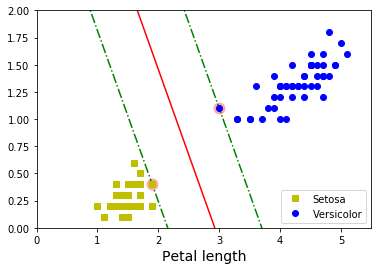

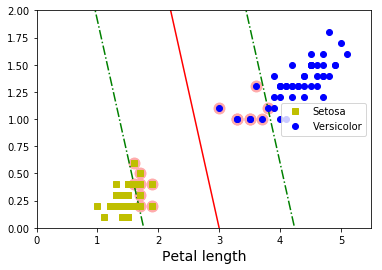

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def plot_svc_decision_boundary(model, xmin, xmax, X, y):   #问题：如果特征维度高于2，应该如何用散点图来表示instances？
    x = np.linspace(xmin, xmax, 100) 
    w0, w1 = model.coef_[0][0], model.coef_[0][1]
    b = model.intercept_[0]
    ## w0 * x0 + w1 * x1 + b = 0 ==> x1 = -w0/w1 * x0 - b/w1
    decision_boundary = -w0/w1 * x - b/w1
    margin = 1/w1 # WIDTH_STREET = 2 / ||w||
    street_upper = decision_boundary + margin
    street_lower = decision_boundary - margin
    support_vectors = model.support_vectors_
    plt.plot(x, decision_boundary,'-r')
    plt.plot(x, street_upper,'g-.')
    plt.plot(x, street_lower,'g-.')
    # 绘出所有的支持向量
    plt.scatter(support_vectors[:,0], support_vectors[:,1], s=120, facecolor = '#FFAAAA')
    plt.plot(X[:,0][y==0], X[:,1][y==0],'ys', label = 'Setosa') ##注意这种索引。画出第一种类别
    plt.plot(X[:,0][y==1], X[:,1][y==1],'bo', label = 'Versicolor') ## 画出第二种类别
# svm_clf = SVC(kernel='linear',C=0.1)    
svm_clf = SVC(kernel='linear',C=float('inf'))  # C = inf 是什么意思？ C越大支持向量边界越严格，C为无穷时不允许街道内有支持向量
svm_clf.fit(X, y)
plot_svc_decision_boundary(svm_clf, 0, 5,X, y)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.ion()
plt.figure()
plot_svc_decision_boundary(SVC(kernel='linear', C = 0.06).fit(X,y), 0, 5, X, y) # 可以看出C不仅影响街道宽度，也影响决策边界
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend()

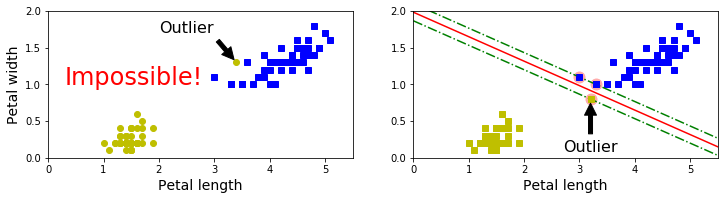

In [77]:
### 一些绘图技巧 ##（直接复制的源代码） #####################
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5, Xo2, yo2)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

In [6]:
### 练习：使用LinearSVC 训练一个线性SVC ###
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.cross_validation import cross_val_predict
lin_svc = Pipeline([
    ('std_scalar',StandardScaler()),
    ('lin_svc', LinearSVC(C=0.1, loss= 'hinge'))  #为什么一定要用hinge loss
])
y_pred = cross_val_predict(lin_svc, X, y, cv = 3)
f1_score(y, y_pred)
# plot_svc_decision_boundary(lin_svc, 0, 5, X, y)

G:\Python\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1.0

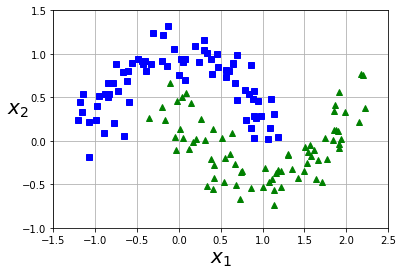

In [7]:
#####################################  第二部分  非线性SVM  ###################################
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=150, noise = 0.15, random_state=42 )
def plot_dataset(X, y, axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20,rotation=0)
plot_dataset(X, y, [-1.5,2.5, -1,1.5])

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
    ('poly_feature', PolynomialFeatures(degree = 3,) ),
    ('std_scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))#
     ]) 
polynomial_svm_clf.fit(X, y) 

Pipeline(memory=None,
     steps=[('poly_feature', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

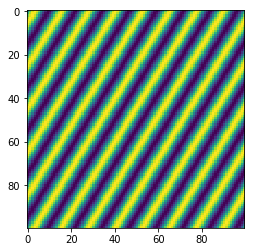

In [9]:
# 同matlab中强大的meshgrid向量化函数，①可以避免循环提高运算速度 ②可以绘制f(x1, x2)图像
axes = [-1.5,2.5,-1,1.5]
x0 = np.linspace(axes[0], axes[1], 100)
x1 = np.linspace(axes[2], axes[3], 100)
X0, X1 = np.meshgrid(x0, x1)
A=2
f = A * np.sin(4*np.pi * (X0 + X1))
plt.imshow(f)

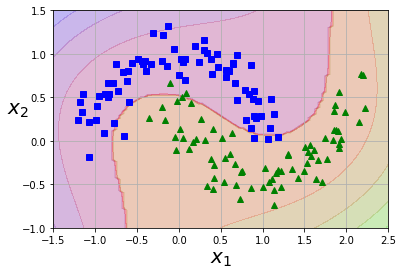

In [14]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
    ('poly_feature', PolynomialFeatures(degree = 3,) ),
    ('std_scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=1, loss = 'hinge', random_state=42))
     ]) 
polynomial_svm_clf.fit(X, y) 

def plot_predictions(clf, axes):
    x0 = np.linspace(axes[0], axes[1], 100)
    x1 = np.linspace(axes[2], axes[3], 100)
    X0,X1 = np.meshgrid(x0, x1)
#     X_new = np.c_[X0, X1]  注意：meshgrid之后X0,X1不再是向量，而是矩阵
    X_new = np.c_[X0.ravel(), X1.ravel()]
    y_new = clf.predict(X_new).reshape(X0.shape)
#     plt.imshow(y_new)
    y_decision = clf.decision_function(X_new).reshape(X0.shape)
    plt.contourf(X0, X1, y_new, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(X0, X1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
plot_predictions(polynomial_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X, y, axes)  

# plt.savefig('决策边界.png',dpi=300)

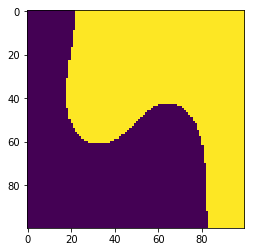

In [16]:
x0 = np.linspace(axes[0], axes[1], 100)
x1 = np.linspace(axes[2], axes[3], 100)
X0,X1 = np.meshgrid(x0, x1)
X_new = np.c_[X0.ravel(), X1.ravel()]
y_new = polynomial_svm_clf.predict(X_new).reshape(X0.shape)
y_decision = polynomial_svm_clf.decision_function(X_new).reshape(X0.shape)
# plt.contourf(X0, X1, y_new, cmap = plt.cm.brg, alpha=0.2)
# plt.contourf(X0, X1, y_decision, cmap = plt.cm.brg, alpha =0.1)
plt.imshow(y_new) # 其实imshow就可以画出决策边界了，只不过不方便调整透明度


In [10]:
############################### 第三部分： 多项式核  ########################
from sklearn.svm import SVC
kernel_svc = Pipeline([
#     ('polynomial_feature',PolynomialFeatures(dim =3)),
    ('std_scale', StandardScaler()),
    ('kernel_svm',SVC(kernel='poly',degree=3,coef0=1, C =5)) #coef0 超参数对结果准确率影响很大？？？？？？？？
     ])
from sklearn.model_selection import cross_val_score
scores_kernel_svm = cross_val_score(kernel_svc, X, y, cv=5, scoring = 'accuracy' )
print(scores_kernel_svm)

[0.96666667 1.         0.96666667 1.         0.96666667]


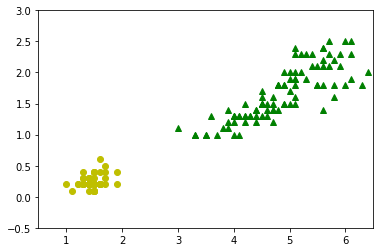

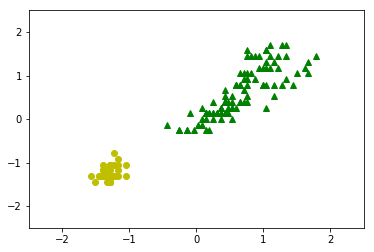

In [1]:
#####复习：绘制决策边界####
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
X = X[:,2:4]
y = iris.target
y[(y==1)|(y==2)]=1
def plot_dataset(X,y,axis_range):
    plt.plot(X[:,0][y==0], X[:,1][y==0],'yo')
    plt.plot(X[:,0][y==1], X[:,1][y==1],'g^')
    plt.axis(axis_range)
    
plot_dataset(X, y, [0.5,6.5,-0.5,3])
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
X_scl = std_scl.fit_transform(X)
plt.ion()
plt.figure()
plot_dataset(X_scl,y,[-2.5,2.5,-2.5,2.5])

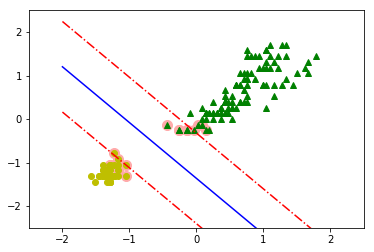

In [5]:
from sklearn.svm import SVC
import numpy as np
def draw_decision_boudary(model, xmin, xmax):
    x = np.linspace(xmin,xmax,100)
    b = model.intercept_[0]
    w0,w1 = model.coef_[0][0],svc_clf.coef_[0][1]
    support_vectors = model.support_vectors_
    # w0x0+w1x1+b=0
    y = -b/w1 - w0/w1*x
    plt.plot(x, y, 'b-')
    margin = 1/w0
    y_upper = y+margin
    y_lower = y-margin
    plt.plot(x,y_upper,'r-.')
    plt.plot(x,y_lower,'r-.')
    plt.scatter(support_vectors[:,0], support_vectors[:,1],s=100,facecolor = '#FFAAAA' )
    
svc_clf = SVC(kernel = 'linear',C = 0.1) #注意如果用LinearSVC，没有support_vectors_这一个属性
svc_clf.fit(X_scl, y)
plot_dataset(X_scl,y,[-2.5,2.5,-2.5,2.5])
draw_decision_boudary(svc_clf, -2,3)

$$ x = \dfrac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

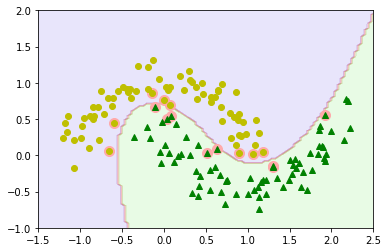

In [76]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=150, noise = 0.15, random_state=42 )
axis_range = [-1.5,2.5,-1.0,2]
plot_dataset(X, y,axis_range)
poly_clf = SVC(kernel = 'poly',coef0=1, degree=4, C =10) #coef参数非常重要
poly_clf.fit(X, y)
def draw_decision_boundary(poly_clf, axis_ranges):
    x0 = np.linspace(axis_range[0],axis_range[1],100)
    x1 = np.linspace(axis_range[2],axis_range[3],100)
    svs = poly_clf.support_vectors_
    X0,X1 = np.meshgrid(x0, x1)
    X_new = np.c_[X0.ravel(), X1.ravel()]
    y_new = poly_clf.predict(X_new).reshape(X0.shape)
    plt.contourf(X0, X1, y_new,cmap = plt.cm.brg, alpha = 0.1 )
    plt.scatter(svs[:,0], svs[:,1], s = 100, facecolor = '#FFAAAA')  #问题：非线性svm如何显示街道
draw_decision_boundary(poly_clf, axis_range)     

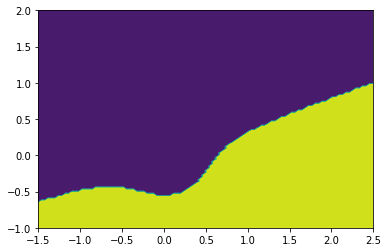

In [42]:
    x0 = np.linspace(axis_range[0],axis_range[1],100)
    x1 = np.linspace(axis_range[2],axis_range[3],100)
    y_new = poly_clf.predict(np.c_[x0,x1])
    X0,X1 = np.meshgrid(x0, x1)
    X_new = np.c_[X0.ravel(), X1.ravel()]
    y_new = poly_clf.predict(X_new).reshape(X0.shape)
    plt.contourf(X0, X1, y_new )